## Using rdkit to get pharmacophore features for a ligand

In [13]:
from rdkit import Chem
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
import os
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

In [6]:
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

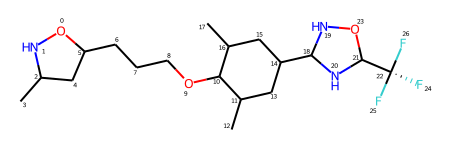

In [18]:
# Load a PDB file
# Bond orders are incorrect
protein_complex = Chem.MolFromPDBFile('../data/1NCR.pdb')
molecules = Chem.SplitMolByPDBResidues(protein_complex)
mol = molecules['W11']
mol.RemoveAllConformers()
mol

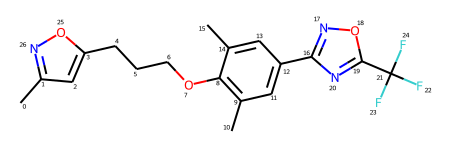

In [14]:
# Create the molecule from its smiles string
smiles = "Cc1cc(CCCOc2c(C)cc(cc2C)c3noc(n3)C(F)(F)F)on1"
new_mol = Chem.MolFromSmiles(smiles)
new_mol

In [16]:
# How do we map the indices to the pdb file indices?
for atom in new_mol.GetAtoms():
    print(atom.GetSymbol(), atom.GetIdx())

C 0
C 1
C 2
C 3
C 4
C 5
C 6
O 7
C 8
C 9
C 10
C 11
C 12
C 13
C 14
C 15
C 16
N 17
O 18
C 19
N 20
C 21
F 22
F 23
F 24
O 25
N 26


In [7]:
feats = factory.GetFeaturesForMol(new_mol)

In [8]:
for feature in feats:
    print(feature.GetFamily())
    print(feature.GetType())
    print(feature.GetAtomIds())
    print('\n----------------------\n')

Acceptor
SingleAtomAcceptor
(7,)

----------------------

Acceptor
SingleAtomAcceptor
(17,)

----------------------

Acceptor
SingleAtomAcceptor
(20,)

----------------------

Acceptor
SingleAtomAcceptor
(26,)

----------------------

Aromatic
Arom5
(1, 2, 3, 25, 26)

----------------------

Aromatic
Arom5
(16, 17, 18, 19, 20)

----------------------

Aromatic
Arom6
(8, 9, 11, 12, 13, 14)

----------------------

Hydrophobe
ThreeWayAttach
(9,)

----------------------

Hydrophobe
ThreeWayAttach
(12,)

----------------------

Hydrophobe
ThreeWayAttach
(14,)

----------------------

Hydrophobe
ChainTwoWayAttach
(4,)

----------------------

Hydrophobe
ChainTwoWayAttach
(5,)

----------------------

LumpedHydrophobe
RH6_6
(8, 9, 11, 12, 13, 14)

----------------------

